# TP SISTEMAS NEBULOSOS

## NOME : VÍTOR CORRÊA SILVA 
## MATRÍCULA : 2019027237

In [103]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

## Funções Relevantes 
Funções relevantes que serão usadas ao longo da atividade


In [104]:
sin = lambda x : np.sin(x)

def Y_i(x,p,q):
    return np.array([(i * p + q) for i in x])

def Sign(x, type, tri, sigma = 0.5):
    if type == 'tri':
        sign = fuzz.trimf(x, tri)
    elif type == 'gauss':
        sign = fuzz.gaussmf(x, tri[1], sigma)
    return sign

def U(x,init,end,step,dist,type = 'tri',direction = 'right', constant = 1):
    if direction == 'right':
        end -= dist
        trian_f = [end - step,end, end + step]
        sign = Sign(x,type,trian_f)
    elif direction == 'left':
        init += dist
        trian_i = [init - step,init, init + step]
        sign = Sign(x,type,trian_i)
    else :
        end -= dist
        trianf = [end - step,end, end + step]
        init += dist
        trian_i = [init - step,init, init + step]
        sign = Sign(x,type,trian_i) + Sign(x,type,trianf)

    AI_const = x.copy()
    AI_const = np.array([constant if  i >= init and i <= end else 0 for i in AI_const])
    U_i = AI_const + sign
    U_i = np.array([constant if i > constant else i for i in U_i ])
    return U_i
    
def Y_final(yi, ui):
    n_samples = len(yi[0])
    n_condi = len(yi)
    Y = []
    
    for n in range(n_samples):
        vp = 0
        norm = 0
        for i in range(n_condi):
            norm += ui[i][n]
            vp += ui[i][n] * yi[i][n]
        Y.append(vp/norm if norm != 0 else 0)
    return np.array(Y)

#Plot dos resultados
def plot_result(input_x, y, Y_hat, ui, yi):
    #plt.plot(input_x, label="u1", marker=".")
    for i,u_ in enumerate(ui):
        plt.plot(input_x,u_, label="u"+str(i))
    #for i,u_ in enumerate(yi):
    #    plt.plot(input_x,y1, label="y"+str(i), marker=".")
    plt.plot(input_x,y, label="sin(x)")
    plt.plot(input_x,Y_hat, label="Y", marker=".")
    plt.legend(loc="upper right")
    plt.show()


def MSE(y, y_pred):
    return np.mean(np.power(y-y_pred,2))



# Questão 3 : 
## Execução com 3 Condições 

Foram gerados parâmetros chave para a construção da distribuição, sendo eles :
* Inicio e Fim da distribuição
* Distância entre cada distribuição
* Ângulo das distribuições

Os parâmetros foram os mesmos para os dois tipos de distrinuição apresentados ao final da célula. É possíbvel ver que o resultado mais próximo da função original tendo em vista que o seno tem uma compartament mais amortecido similar ao da gaussina e não linear como o da função triangular.





Triangular


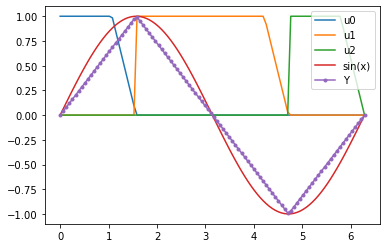

Erro medio quadratico Aproximação Triangular: 0.02254

 Gaussiana


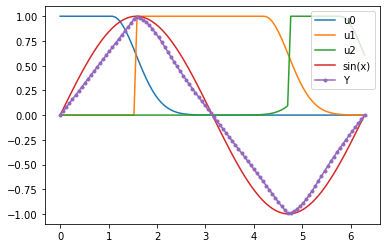

Erro medio quadratico Aproximação Gaussiana: 0.01771


In [105]:
# Parameters :
lower_limit = 0
upper_limit = 2*np.pi
step = 100

# input list :
input_x = np.linspace(lower_limit, upper_limit,100)

#Real values :
sin_x = sin(input_x)

# U signal fuzzy parameters :
angle = 0.5
dist = angle
start = [0, np.pi/2, 3*np.pi/2]
end = [np.pi/2,3*np.pi/2, 2*np.pi]

# Generate U triangular signals :
U_tri = list()
for i, j in zip(start,end):
    U_tri.append(U(input_x.copy(), i, j, angle, dist, type = 'tri', constant = 1, direction = 'right'))

# Generate U gaussian signals :
U_gauss = list()
for i, j in zip(start,end):
    U_gauss.append(U(input_x.copy(), i, j, angle, dist, type = 'gauss', constant = 1, direction = 'right'))

# P and Q values :
P = [2/np.pi, -2/np.pi, 2/np.pi]
Q = [0,2,-4]

y_i = list()
for p,q in zip(P,Q):
    y_i.append(Y_i(input_x.copy(),p,q))

# Finals Results :

Y_tri = Y_final(y_i, U_tri)
Y_gauss = Y_final(y_i, U_gauss)
mse_tri = MSE(sin_x,Y_tri)
mse_gauss = MSE(sin_x,Y_gauss)
print("Triangular")
plot_result(input_x, sin_x, Y_tri, U_tri, y_i)
print('Erro medio quadratico Aproximação Triangular: {:.5f}'.format(mse_tri))
print("\n Gaussiana")
plot_result(input_x, sin_x, Y_gauss, U_gauss, y_i)
print('Erro medio quadratico Aproximação Gaussiana: {:.5f}'.format(mse_gauss))


## Execução com 5 condições

Os parâmetros Fuzzy da função foram modificados para conter mais duas condições, próximo aos pontos de mínimo e máximo da função representadas por uma reta descendente e outra ascedente . Obtemos com isso um resultado mais similar aos valores reais.


Triangular


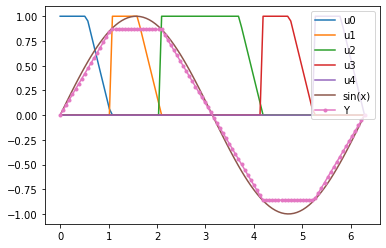

Erro medio quadratico Aproximação Triangular: 0.00491

 Gaussiana


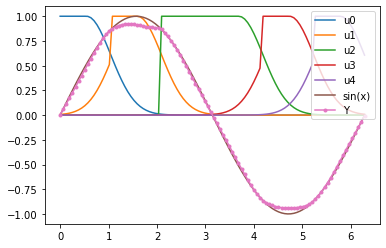

Erro medio quadratico Aproximação Gaussiana: 0.00108


In [106]:
# U signal fuzzy parameters :
start = [0, np.pi/3, 2*np.pi/3, 4*np.pi/3, 5*np.pi/3 ]
end = [np.pi/3, 2*np.pi/3, 4*np.pi/3, 5*np.pi/3,2*np.pi]

# Generate U triangular signals :
U_tri = list()
for i, j in zip(start,end):
    U_tri.append(U(input_x.copy(), i, j, angle, dist, type = 'tri', constant = 1, direction = 'right'))

# Generate U gaussian signals :
U_gauss = list()
for i, j in zip(start,end):
    U_gauss.append(U(input_x.copy(), i, j, angle, dist, type = 'gauss', constant = 1, direction = 'right'))

# P and Q values :
P = [2.598/np.pi, 0, -2.598/np.pi, 0, 2.598/np.pi]
Q = [0,0.866,2.598, -0.86,-5.196]

y_i = list()
for p,q in zip(P,Q):
    y_i.append(Y_i(input_x.copy(),p,q))

# Finals Results :

Y_tri = Y_final(y_i, U_tri)
Y_gauss = Y_final(y_i, U_gauss)
mse_tri = MSE(sin_x,Y_tri)
mse_gauss = MSE(sin_x,Y_gauss)
print("Triangular")
plot_result(input_x, sin_x, Y_tri, U_tri, y_i)
print('Erro medio quadratico Aproximação Triangular: {:.5f}'.format(mse_tri))
print("\n Gaussiana")
plot_result(input_x, sin_x, Y_gauss, U_gauss, y_i)
print('Erro medio quadratico Aproximação Gaussiana: {:.5f}'.format(mse_gauss))

 ## Execução com 10 condições

 Seguindo a proposta da seção anterior foram inseridas mais retas para locais com curvatura particular. O que gera uma aproximação consideravelmente melhor do que com 5 condições.

Triangular


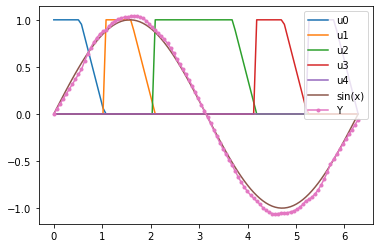

Erro medio quadratico Aproximação Triangular: 0.00188

 Gaussiana


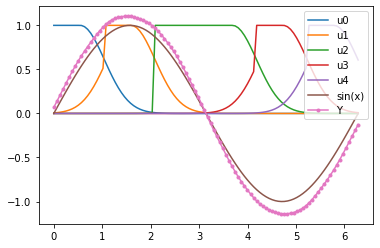

Erro medio quadratico Aproximação Gaussiana: 0.01324


In [107]:
# U signal fuzzy parameters :

limt = [0, np.pi/3, np.pi/2, 2*np.pi/3, 5*np.pi/6, np.pi, 7*np.pi/6, 4*np.pi/3, 3*np.pi/2, 5*np.pi/3, 2*np.pi]
ui_tri = []
ui_gauss = []
for i in range(len(limt)-1):
    start1 = limt[i]
    final1 = limt[i+1]
    if i==0:
        direc = 'right'
    elif i < len(limt)-2:
        direc = 'both'
    else:
        direc = 'left'
    u_t = U(input_x.copy(), start1, final1, angle, dist, type = 'tri', constant = 1, direction = direc)
    u_g = U(input_x.copy(), start1, final1, angle, dist, type = 'gauss', constant = 1, direction = direc)
    ui_tri.append(u_t)
    ui_gauss.append(u_g)

# P and Q values :
P = [2.598/np.pi, 0.256, -0.256, -2/np.pi, -3/np.pi, -3/np.pi, -2.196/np.pi, -0.256, 0.256, 2.598/np.pi]
Q = [0.0, 0.62, 1.45, 2.196, 3.0, 3.0, 2.0, 0.15, -2.256, -5.256]

y_i = list()
for p,q in zip(P,Q):
    y_i.append(Y_i(input_x.copy(),p,q))

# Finals Results :

Y_tri = Y_final(y_i, ui_tri)
Y_gauss = Y_final(y_i, ui_gauss)
mse_tri = MSE(sin_x,Y_tri)
mse_gauss = MSE(sin_x,Y_gauss)
print("Triangular")
plot_result(input_x, sin_x, Y_tri, U_tri, y_i)
print('Erro medio quadratico Aproximação Triangular: {:.5f}'.format(mse_tri))
print("\n Gaussiana")
plot_result(input_x, sin_x, Y_gauss, U_gauss, y_i)
print('Erro medio quadratico Aproximação Gaussiana: {:.5f}'.format(mse_gauss))

# Questão 4 : Dilema da Gorjeta


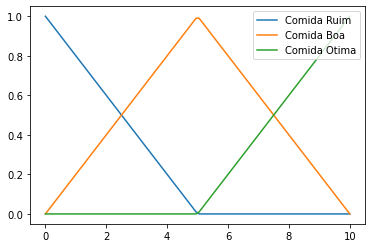

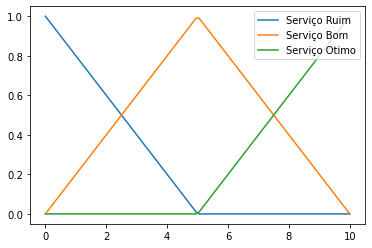

TypeError: Y_i() missing 1 required positional argument: 'q'

In [108]:
# Input :
x = np.linspace(0, 10, 100)
# Food (Bad \ Excellent) :
food = np.linspace(0,1,11)
# Service (Bad \ Excellent)
service = np.linspace(0,1,11)

# Bad Food 
u_1 = fuzz.trimf(x, [0,0,5])
# Good Food
u_2 = fuzz.trimf(x, [0,5,10])
#Excellent Food
u_3 = fuzz.trimf(x, [5,10,10])

#Bad Service
u_4 = fuzz.trimf(x, [0,0,5])
#Good Service
u_5 = fuzz.trimf(x, [0,5,10])
#Excellent Food
u_6 = fuzz.trimf(x, [5,10,10])

#Food
plt.plot(x,u_1, label="Comida Ruim")
plt.plot(x,u_2, label="Comida Boa")
plt.plot(x,u_3, label="Comida Otima")
plt.legend(loc="upper right")
plt.show()

#Service
plt.plot(x,u_4, label="Serviço Ruim")
plt.plot(x,u_5, label="Serviço Bom")
plt.plot(x,u_6, label="Serviço Otimo")
plt.legend(loc="upper right")
plt.show()

#Questions Conditions 
u1_f = u_1+u_4
u2_f = u_5
u3_f = u_3+u_6

u1_f = np.array([1 if i>1 else i for i in u1_f])
u3_f = np.array([1 if i>1 else i for i in u3_f])
y_i = [ 15*x, np.array([15]*len(x)), (10 * x) + 15]
u_i = [u1_f, u2_f, u3_f]

Y = Y_final(y_i,u_i)

plt.plot(x,Y, label="Output", marker=".")
plt.legend(loc="upper right")
plt.show()